# E-Commerce Customer Churn Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("E Commerce Dataset.xlsx",sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
# # describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [4]:
# Gives the information about types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
# Gives information about rows and columns in table
df.shape

(5630, 20)

In [6]:
# Gives information about  Payment methods with corresponding counts.
df['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

In [7]:
# Gives information about customers preferred order category along with value counts.
df['PreferedOrderCat'].value_counts()

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

In [8]:
# Describe the  preferred login device of customer with counts.
df['PreferredLoginDevice'].value_counts()

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

In [9]:
# Checking the null values in corresonding columns in dataset
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [10]:
# Dropping null value from the dataset
df.dropna(inplace=True)

In [11]:
# Now the dataset contains zero null values
df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [12]:
# Changing the datatype  of columns to approriate format

df['WarehouseToHome']= df['WarehouseToHome'].astype('int64')
df['HourSpendOnApp'] = df['HourSpendOnApp'].astype('int64')
df['Tenure']= df['Tenure'].astype('int64').astype('int64')
df['OrderAmountHikeFromlastYear']=df['OrderAmountHikeFromlastYear'].astype('int64')
df['CouponUsed']=df['CouponUsed'].astype('int64')
df['OrderCount']=df['OrderCount'].astype('int64')
df['DaySinceLastOrder']=df['DaySinceLastOrder'].astype('int64')
df['CashbackAmount']= df['CashbackAmount'].astype('int64')


In [13]:
# Here phone and Mobile Phone referes to same device so relace it with same one.

df['PreferredLoginDevice']=df['PreferredLoginDevice'].replace('Phone','Mobile Phone')
df['PreferedOrderCat'] =df['PreferedOrderCat'].replace('Mobile','Mobile Phone')


In [14]:
# Cheking the unique value corresponding to 'Prefered order category' 
df['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile Phone', 'Fashion', 'Others',
       'Grocery'], dtype=object)

In [15]:
# verifying the changed data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3774 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   CustomerID                   3774 non-null   int64 
 1   Churn                        3774 non-null   int64 
 2   Tenure                       3774 non-null   int64 
 3   PreferredLoginDevice         3774 non-null   object
 4   CityTier                     3774 non-null   int64 
 5   WarehouseToHome              3774 non-null   int64 
 6   PreferredPaymentMode         3774 non-null   object
 7   Gender                       3774 non-null   object
 8   HourSpendOnApp               3774 non-null   int64 
 9   NumberOfDeviceRegistered     3774 non-null   int64 
 10  PreferedOrderCat             3774 non-null   object
 11  SatisfactionScore            3774 non-null   int64 
 12  MaritalStatus                3774 non-null   object
 13  NumberOfAddress              3774

In [16]:
# Removing duplicate rows

df.drop_duplicates(inplace = True)

# Gender-wise Churn rate 

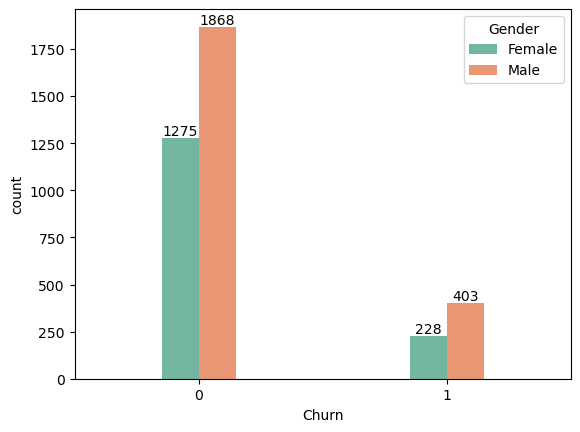

In [17]:

ax = sns.countplot(x='Churn',data=df,width=0.3,hue='Gender',palette='Set2')

for bars in ax.containers:
    ax.bar_label(bars)

#### Result : Churn rate is higher in males as compared to females.
    

# Distribution of Number of Customer Orders

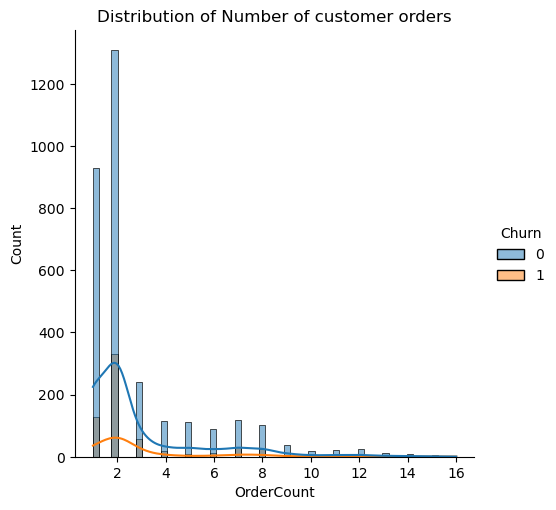

In [18]:
sns.displot(x='OrderCount', kde=True, data=df,hue='Churn')
plt.title("Distribution of Number of customer orders")
plt.show()

### Conclusion : The frequency of customers ordering upto 2 products is highest and retention rate is also high for customer ordering 2 orders.


# Order category-wise company customers

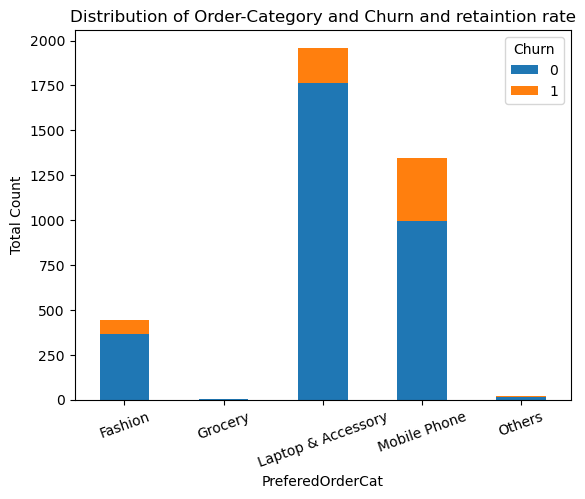

In [19]:
d5= df.groupby(['PreferedOrderCat','Churn']).size().unstack().plot(kind='bar',stacked=True)
plt.title('Distribution of Order-Category and Churn and retaintion rate')
plt.ylabel('Total Count')
plt.xticks(rotation =20)
plt.show()


#### Conclusion: Churn rate is higher for customer purchasing Mobile phone and  Laptop & Accesory.

In [20]:
# distribution of  customer based on preferred login device  counts
data=df['PreferredLoginDevice'].value_counts()
data

Mobile Phone    2663
Computer        1111
Name: PreferredLoginDevice, dtype: int64

In [21]:
device_percentage = ((data)/data.sum())*100
device_percentage

Mobile Phone    70.561738
Computer        29.438262
Name: PreferredLoginDevice, dtype: float64

# Customer preference to login on company website

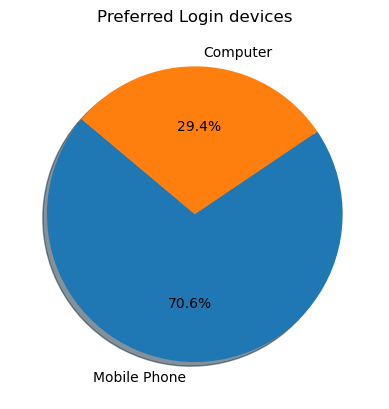

In [22]:
data=plt.pie(device_percentage,labels= device_percentage.index, autopct='%1.1f%%', startangle=140,shadow=True)

plt.title('Preferred Login devices')
plt.show()


#### Conclusion : 70% customer prefers to login via Mobile phone while 29 % customers prefers to login via computer.

In [23]:
d1 = df['PreferredPaymentMode'].value_counts().reset_index()
d1

,index,PreferredPaymentMode
0,Debit Card,1538
1,Credit Card,1124
2,E wallet,443
3,COD,301
4,UPI,285
5,Cash on Delivery,48
6,CC,35


# Payment mode wise distribution of customers

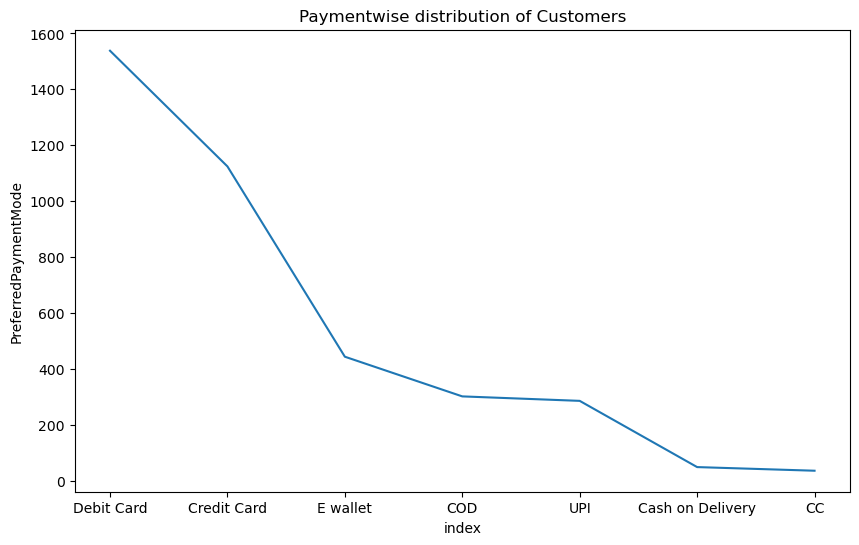

In [24]:
plt.figure(figsize=(10,6))
sns.lineplot(data=d1,x='index',y='PreferredPaymentMode',sizes=5)

plt.title('Paymentwise distribution of Customers')

plt.show()

#### Conclusion : Most of the customers used to pay via debit card and credit card while very small  number of customers prefer                cash on delivery.

# Scatter plot of Number of Orders and Coupon Used

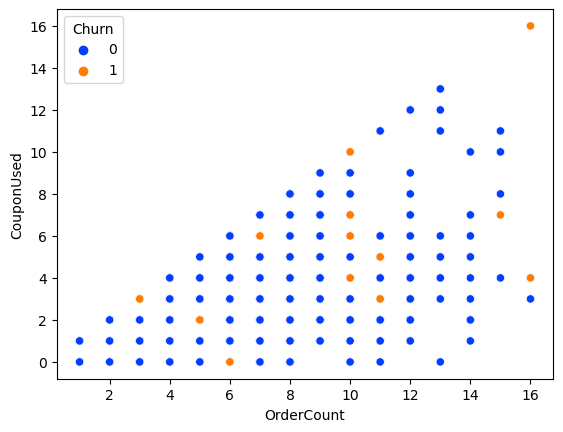

In [25]:
sns.scatterplot(data=df,x= 'OrderCount',y='CouponUsed',palette='bright',hue='Churn')
plt.show()


#### conclusion : As number of Order increases chances of getting couponcode increases and also churn rate is high for order count 10 as compared to others.

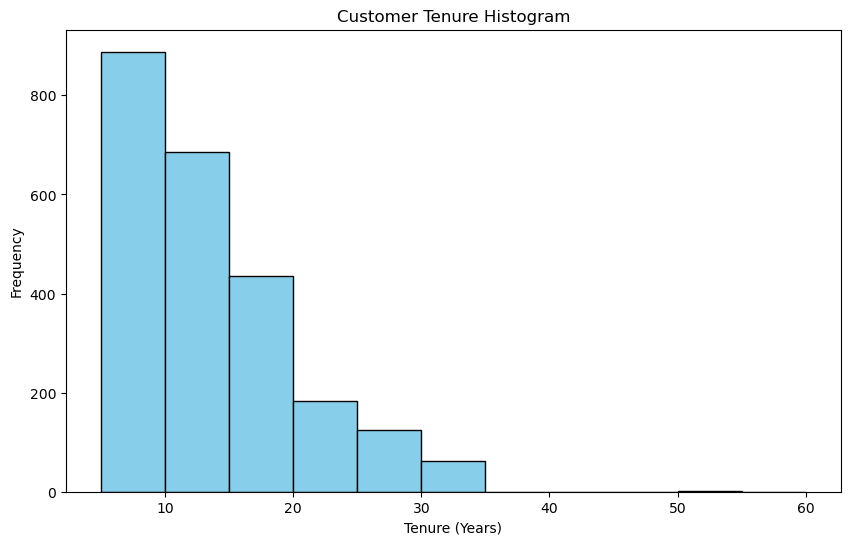

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(df['Tenure'], bins=[5,10,15,20,25,30,35,40,45,50,55,60], color='skyblue', edgecolor='black')
plt.xlabel("Tenure (Years)")
plt.ylabel("Frequency")
plt.title("Customer Tenure Histogram")
plt.show()

#### Conclusion : As the  years with company increases customer chances of churning increases.

# Heatmap of checking correlation between variables.

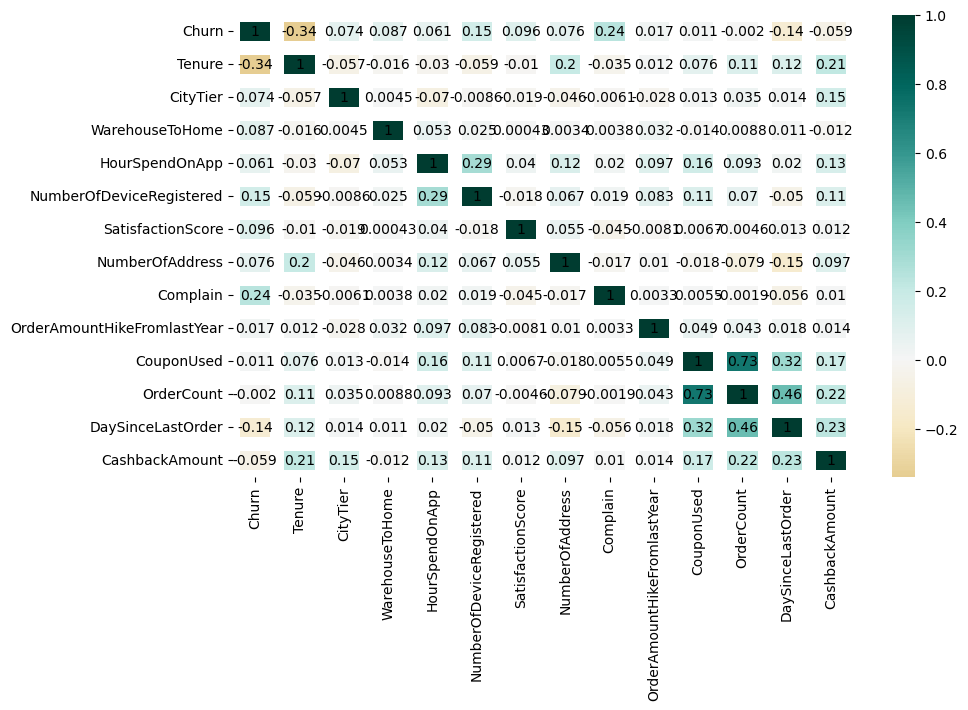

In [27]:
y = {'fontsize': 10,'color':'black'}
numeric_columns = df.select_dtypes(include='number').drop(columns=['CustomerID'])
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(numeric_columns.corr(), center=0, cmap='BrBG', annot=True,annot_kws= y,linewidth=10)
plt.show()

#### 1) There is strong correlation between coupon used and order count. beacause  customers hope that  they will get more coupon as number of order increases.
#### 2) There is negative relation between churn rate and tenure. 
#### 3) churn rate is also depends on satisfication score of customers.
#### 4) There is co-relation between customer churn rate and complain by customer.It is obvious that if complain are not handled     properly   customer churning rate increases.


# Boxplot of Order count with city tier.

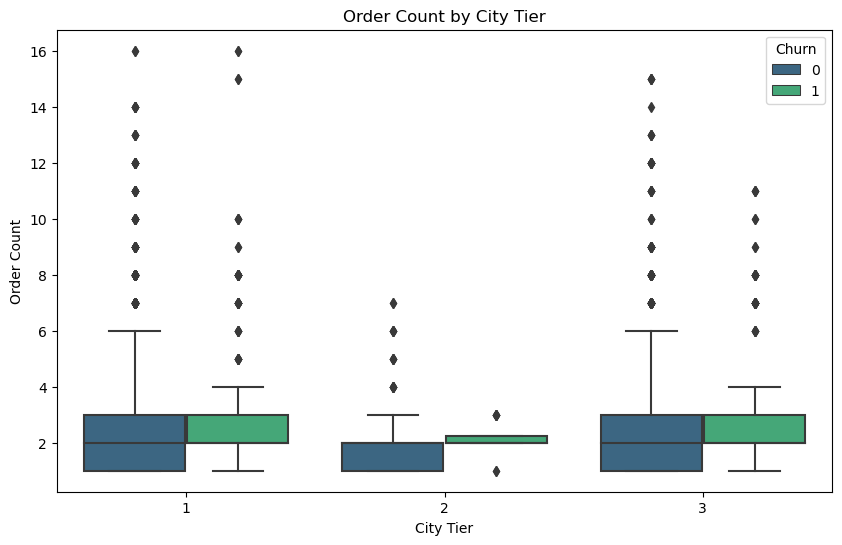

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='CityTier', y='OrderCount', data=df, palette='viridis',hue='Churn')
plt.xlabel("City Tier")
plt.ylabel("Order Count")
plt.title("Order Count by City Tier")
plt.show()

#### Conclusion : Average order count for all city is same ie. 2 , Maximum  order count for city1 and city 3 is also same i.e. 6 and Churn rate is high  for tier 1 and tier 3 city  average order count is 3 for respective city.

# Payment wise Churn rate

In [29]:
d4= df.groupby(['PreferredPaymentMode'],as_index=False)['Churn'].sum().sort_values(by='Churn',ascending=False)
d4

,PreferredPaymentMode,Churn
4,Debit Card,230
3,Credit Card,169
5,E wallet,94
1,COD,73
6,UPI,48
0,CC,10
2,Cash on Delivery,7


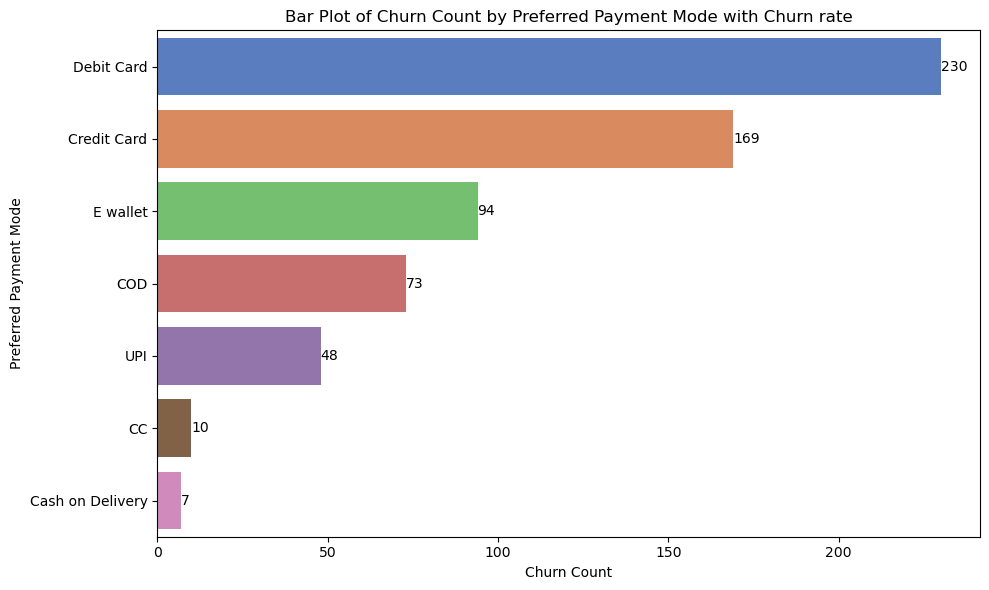

In [30]:
plt.figure(figsize=(10, 6))  
ax=sns.barplot(x='Churn', y='PreferredPaymentMode', data=d4, palette='muted')
plt.xlabel('Churn Count')
plt.ylabel('Preferred Payment Mode')
plt.title('Bar Plot of Churn Count by Preferred Payment Mode with Churn rate')
plt.tight_layout()
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

#### conclusion : Churn rate is higher in case of debit card and credit card users.Least in cash on Delivery customers.

# Gender-wise cashback Amount

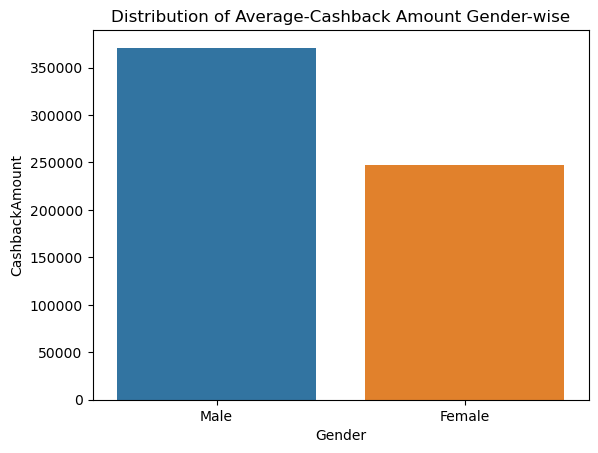

In [31]:
d2 = df.groupby(['Gender'],as_index=False)['CashbackAmount'].sum().sort_values(by='CashbackAmount',ascending=False)

d3=sns.barplot(data=d2,x='Gender',y='CashbackAmount')
plt.title('Distribution of Average-Cashback Amount Gender-wise')
plt.show()

### conclusion : Males are likely to receive more cashback amount as compared to females.Because males prefer to purchase online more as compared to females.

# Distribution of Satisfaction Score for Churned and Retained Customers.

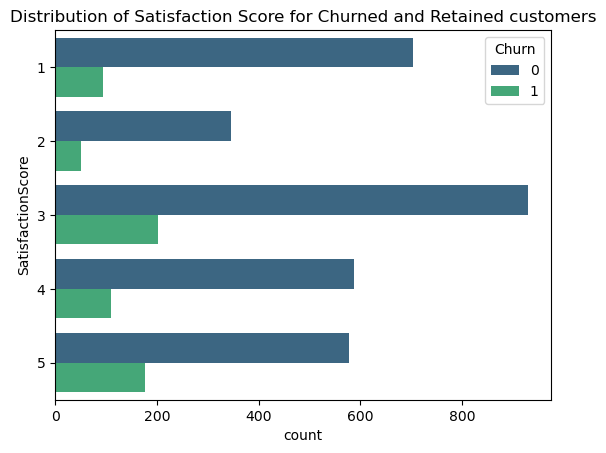

In [32]:
sns.countplot(y='SatisfactionScore', hue='Churn', palette='viridis', data=df)
plt.title("Distribution of Satisfaction Score for Churned and Retained customers")
plt.show()

### conclusion: Customer with satisfaction score  3 on service   are more likely to be churned and more likely to be retained in service.While customer with satisfaction score 2 are less likely churned as well as less likely retained. 

# Distribution of Marital Status base on Churned and Retained Customer.

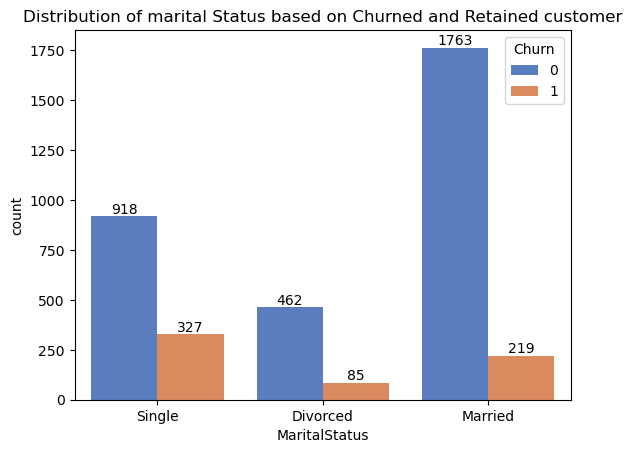

In [33]:
ax=sns.countplot(x='MaritalStatus',hue='Churn',data=df,palette='muted')
plt.title('Distribution of marital Status based on Churned and Retained customer')


for bars in ax.containers:
    ax.bar_label(bars)
    
plt.show()

### Conclusion: Chances of churning is higher in case  unmarried person. while retaintion rate is higher in married person.

# Churned and retained by preferred Login Devices

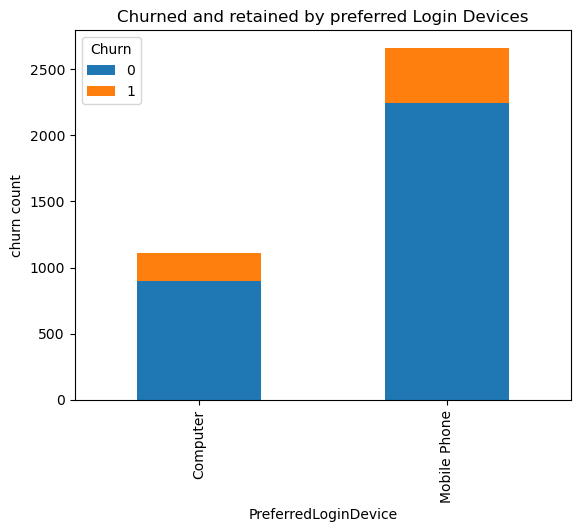

In [34]:
grouped_data= df.groupby(['PreferredLoginDevice','Churn']).size().unstack().plot(kind='bar',stacked=True)
plt.ylabel('churn count')
plt.title('Churned and retained by preferred Login Devices')


plt.show()


### Conclusion : Customer login with Mobile Phone are more likely churned and retained.because Most of the customer login via Mobile phone as compared to computer.

# Recommendations

1) Address and resolve customer complaints promptly and efficiently. A high correlation between churn and customer complaints suggests that better customer service can retain more customers.
2) Focus on increasing customer satisfaction scores. A higher satisfaction score indicates a lower likelihood of churning. Conduct surveys and gather feedback to identify areas for improvement.
3) Implement customer retention programs, such as loyalty rewards and personalized offers. This can incentivize customers to continue shopping with your platform.
4) Since males tend to receive more cashback, consider tailoring cashback offers to female customers to make them more competitive. Offer cashback on a broader range of products to increase its appeal.
5) As a majority of customers prefer mobile devices for shopping, focus on improving your mobile app's user experience. Ensure it is user-friendly, fast, and offers all the features that customers need.
6) Customers with longer tenure are more likely to churn. Offer special deals, discounts, or exclusive access to long-term customers to reward their loyalty.
7) Actively engage with customer feedback and implement suggested improvements. Customers appreciate being heard, and it can lead to increased loyalty.
8) Ensure hassle-free returns and refunds for customers. This can build trust and increase customer satisfaction.
9) Keep an eye on the market and offer competitive pricing. Regularly check competitor pricing and adjust your rates accordingly.

# ---- END-----